In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import export_graphviz
from IPython.display import Image   
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = sns.load_dataset('titanic') # Load the Titanic dataset
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.isnull().sum() #checking for null values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.duplicated().sum()  #checking for duplicate values

np.int64(107)

In [7]:
df.drop_duplicates(inplace=True) #removing duplicate values

In [8]:
df.duplicated().sum() #checking for duplicate values

np.int64(0)

In [9]:
df.columns #columns in the dataset

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [10]:
df1 = df.drop(['class', 'deck', 'embark_town', 'alive'], axis=1) #dropping unnecessary columns
df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,woman,False,False
887,1,1,female,19.0,0,0,30.0000,S,woman,False,True
888,0,3,female,NaN,1,2,23.4500,S,woman,False,False
889,1,1,male,26.0,0,0,30.0000,C,man,True,True


In [11]:
df1.head(10) #displaying first 10 rows of the dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True
5,0,3,male,NaN,0,0,8.4583,Q,man,True,True
6,0,1,male,54.0,0,0,51.8625,S,man,True,True
7,0,3,male,2.0,3,1,21.0750,S,child,False,False
8,1,3,female,27.0,0,2,11.1333,S,woman,False,False
9,1,2,female,14.0,1,0,30.0708,C,child,False,False


In [12]:
df1['age'].fillna(round(df1['age'].mean()), inplace=True) #filling missing values in 'age' with the mean value
df1['embarked'].fillna(df1['embarked'].mode()[0], inplace=True) #filling missing values in 'embarked' with the mode value

In [13]:
df1.head(10) #displaying first 10 rows of the dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True
5,0,3,male,30.0,0,0,8.4583,Q,man,True,True
6,0,1,male,54.0,0,0,51.8625,S,man,True,True
7,0,3,male,2.0,3,1,21.0750,S,child,False,False
8,1,3,female,27.0,0,2,11.1333,S,woman,False,False
9,1,2,female,14.0,1,0,30.0708,C,child,False,False


In [14]:
df1.describe().T #descriptive statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
survived,784.0,0.411990,0.492507,0.00,0.00,0.0,1.00000,1.0000
pclass,784.0,2.243622,0.855056,1.00,1.00,3.0,3.00000,3.0000
age,784.0,29.887015,13.723818,0.42,22.00,30.0,36.00000,80.0000
sibsp,784.0,0.522959,0.986231,0.00,0.00,0.0,1.00000,8.0000
parch,784.0,0.415816,0.836922,0.00,0.00,0.0,1.00000,6.0000
fare,784.0,34.711740,52.160151,0.00,8.05,15.9,34.10935,512.3292


In [15]:
for col in df1.columns: 
    print(df1[col].unique()) #displaying unique values in each column

[0 1]
[3 1 2]
['male' 'female']
[22.   38.   26.   35.   30.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80

In [16]:
cat_col = df1.select_dtypes(exclude=['int','float']).columns 
num_col = df1.select_dtypes(include=np.number).columns.tolist() 

print(cat_col)
print(num_col)

Index(['sex', 'embarked', 'who', 'adult_male', 'alone'], dtype='object')
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


survived


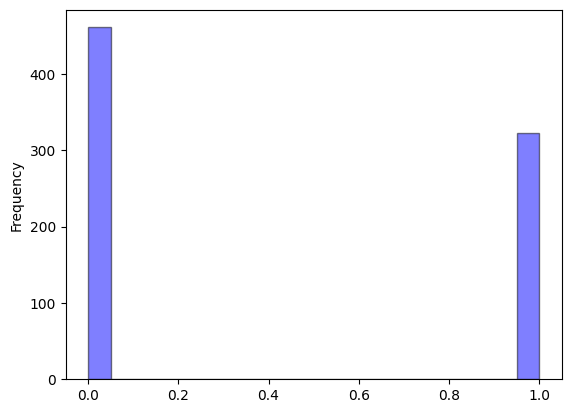

pclass


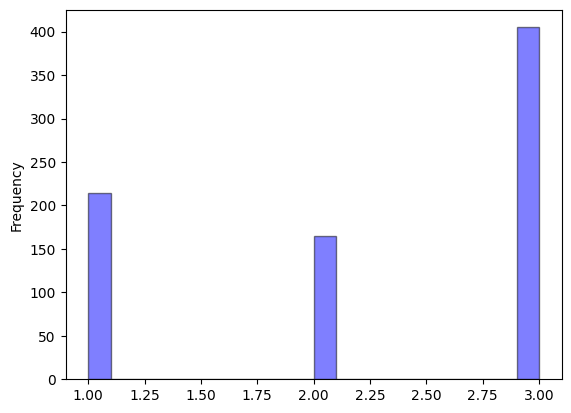

age


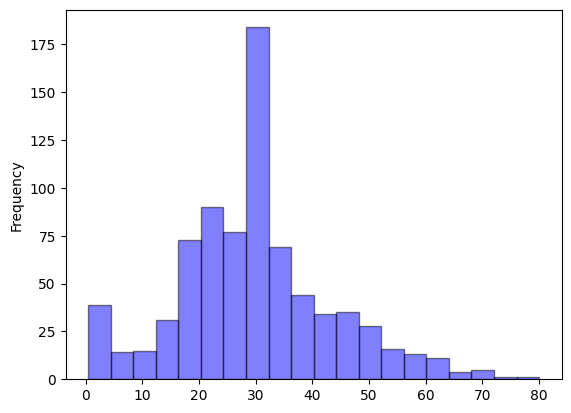

sibsp


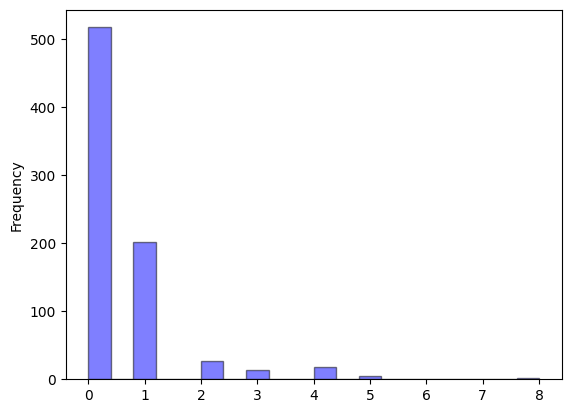

parch


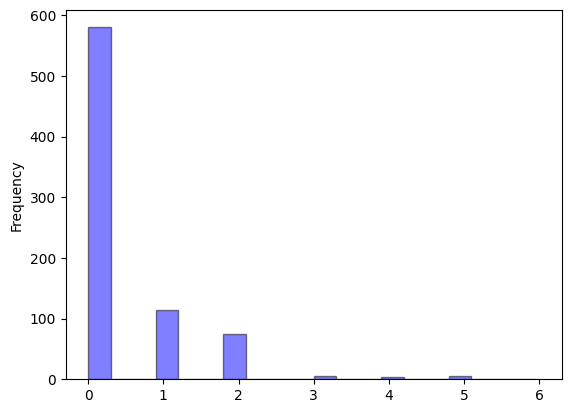

fare


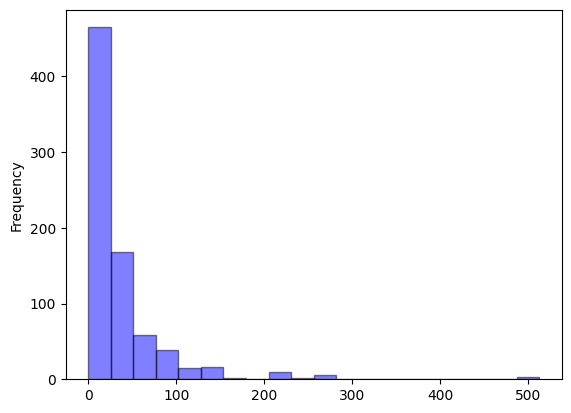

In [17]:
for col in num_col:
    print(col)
    plt.subplot(1,1,1)
    df1[col].plot(kind='hist', color='b', alpha = 0.5, bins=20,edgecolor='black')
    plt.ylabel('Frequency')
    plt.show()

sex


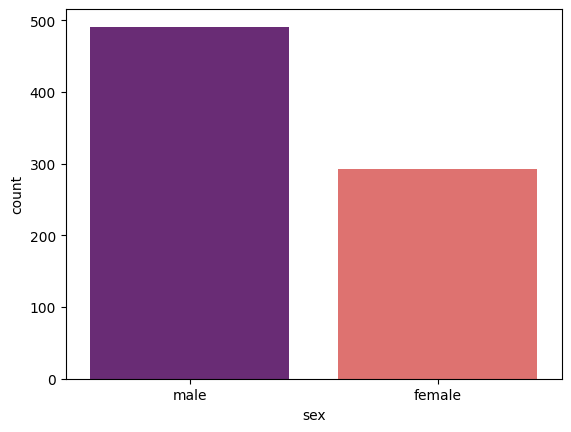

embarked


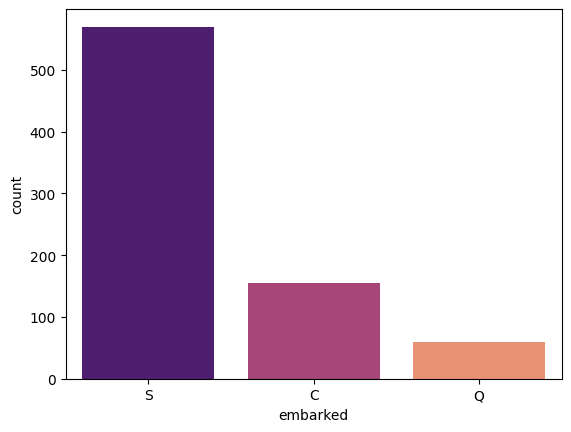

who


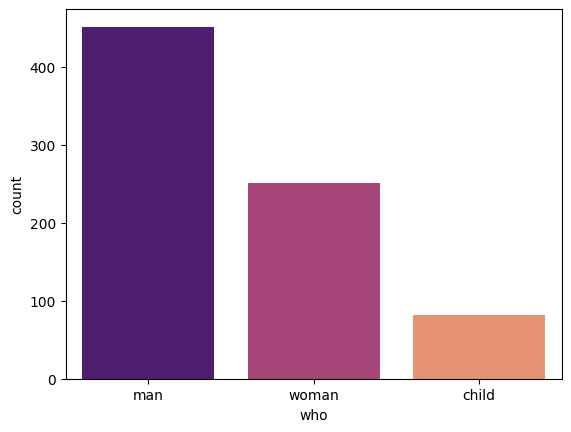

adult_male


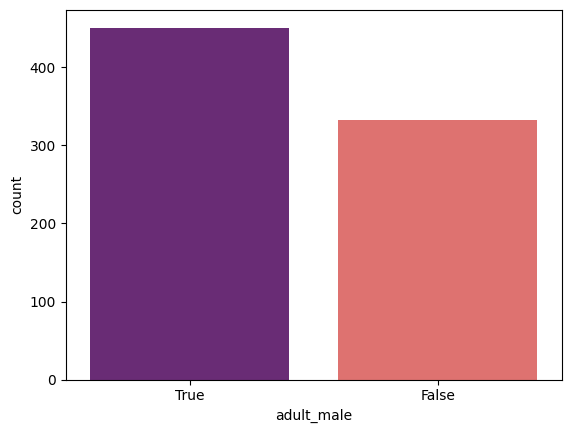

alone


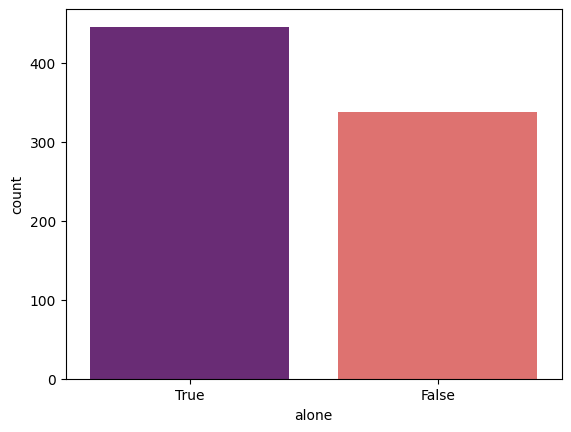

In [18]:
for col in cat_col:
    print(col)
    sns.countplot(x=col, data=df1, order=df1[col].value_counts().index, palette='magma')
    plt.show()

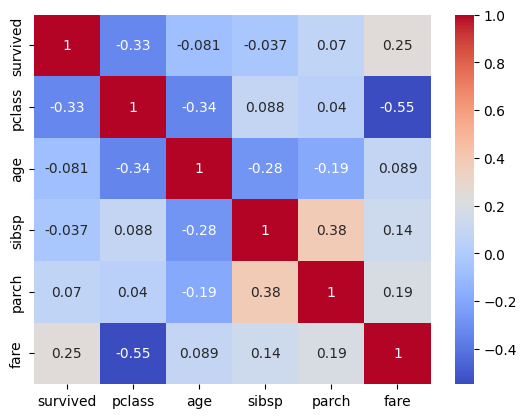

In [19]:
corr = df1[num_col].corr(method='pearson')
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [20]:
X = df1[['pclass', 'age', 'sibsp', 'parch', 'fare']] #features for the model
y = df1['survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the dataset into training and testing sets

In [22]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1) # Create a Random Forest Classifier model
model.fit(X_train, y_train) # Fit the model on the training data

RandomForestClassifier(max_depth=5, random_state=1)

In [23]:
y_pred = model.predict(X_test) # Make predictions on the test set
y_pred  # Display the predicted values

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [24]:
accuracy = accuracy_score(y_test, y_pred) # Calculate the accuracy of the model
accuracy = accuracy*100 # Display the accuracy
accuracy 

68.15286624203821

In [25]:
classification_rep= classification_report(y_test, y_pred) # Display the classification report
print(classification_rep) 

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        88
           1       0.68      0.52      0.59        69

    accuracy                           0.68       157
   macro avg       0.68      0.66      0.66       157
weighted avg       0.68      0.68      0.67       157



In [26]:
new_data = [[3, 35, 0, 0, 8.05]] # New data for prediction
y_pred = model.predict(new_data) # Display the prediction for the new data
y_pred[0] # Visualizing the feature importance


np.int64(0)